In [1]:
# nltk.download('stopwords')
# nltk.download("wordnet")

In [2]:
import nltk
import re
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import pandas as pd
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [3]:
filename = '11-0.txt'
with open(filename, encoding='utf-8') as f:
    text = f.read()

start = 'CHAPTER XII.   Alice’s Evidence'
end = '\n\nTHE END \n\n\n\n\n***'
chapters = text[text.index(start)+len(start)+5:text.index(end)].lower().split('\n\n\n\n\n')
len(chapters)

12

In [4]:
data = pd.DataFrame({'Chapter': range(1,13), 'Before preprocessing': chapters})

stop_words = set(stopwords.words('english'))
clean_text = chapters.copy()

for i in range(len(chapters)):

    clean_text[i] = re.sub("[^a-zA-Z ]+", " ", clean_text[i])
    clean_text[i] = re.sub("-", " ", clean_text[i])
    clean_text[i] = re.sub(" +", " ", clean_text[i])
    clean_text[i] = re.sub(r"[^\w\s]", "", clean_text[i], re.UNICODE)
    clean_text[i] = WhitespaceTokenizer().tokenize(clean_text[i])
    # next is to omit chapter numbers
    clean_text[i] = clean_text[i][2:]
    
    clean_text[i] = [token for token in clean_text[i] if token not in stop_words]
    clean_text[i] = [WordNetLemmatizer().lemmatize(token) for token in clean_text[i]]

data['After preprocessing'] = [' '.join(clean_text[i]) for i in range(len(chapters))]
data

,Chapter,Before preprocessing,After preprocessing
0,1,chapter i.\ndown the rabbit-hole\n\n\nalice wa...,rabbit hole alice beginning get tired sitting ...
1,2,chapter ii.\nthe pool of tears\n\n\n“curiouser...,pool tear curiouser curiouser cried alice much...
2,3,chapter iii.\na caucus-race and a long tale\n\...,caucus race long tale indeed queer looking par...
3,4,chapter iv.\nthe rabbit sends in a little bill...,rabbit sends little bill white rabbit trotting...
4,5,chapter v.\nadvice from a caterpillar\n\n\nthe...,advice caterpillar caterpillar alice looked ti...
5,6,chapter vi.\npig and pepper\n\n\nfor a minute ...,pig pepper minute two stood looking house wond...
6,7,chapter vii.\na mad tea-party\n\n\nthere was a...,mad tea party table set tree front house march...
7,8,chapter viii.\nthe queen’s croquet-ground\n\n\...,queen croquet ground large rose tree stood nea...
8,9,chapter ix.\nthe mock turtle’s story\n\n\n“you...,mock turtle story think glad see dear old thin...
9,10,chapter x.\nthe lobster quadrille\n\n\nthe moc...,lobster quadrille mock turtle sighed deeply dr...


In [5]:
vectorizer_tftidf = TfidfVectorizer()
vectorizer_tftidf.fit(data['After preprocessing'].tolist())
chapters_tfidf = vectorizer_tftidf.transform(data['After preprocessing'].tolist())

important_words = pd.DataFrame(chapters_tfidf.toarray(), columns=vectorizer_tftidf.get_feature_names_out())
important_words = important_words.drop(columns = 'alice', axis = 1)

In [6]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        max_words=100,
        max_font_size=50,
        scale=3,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

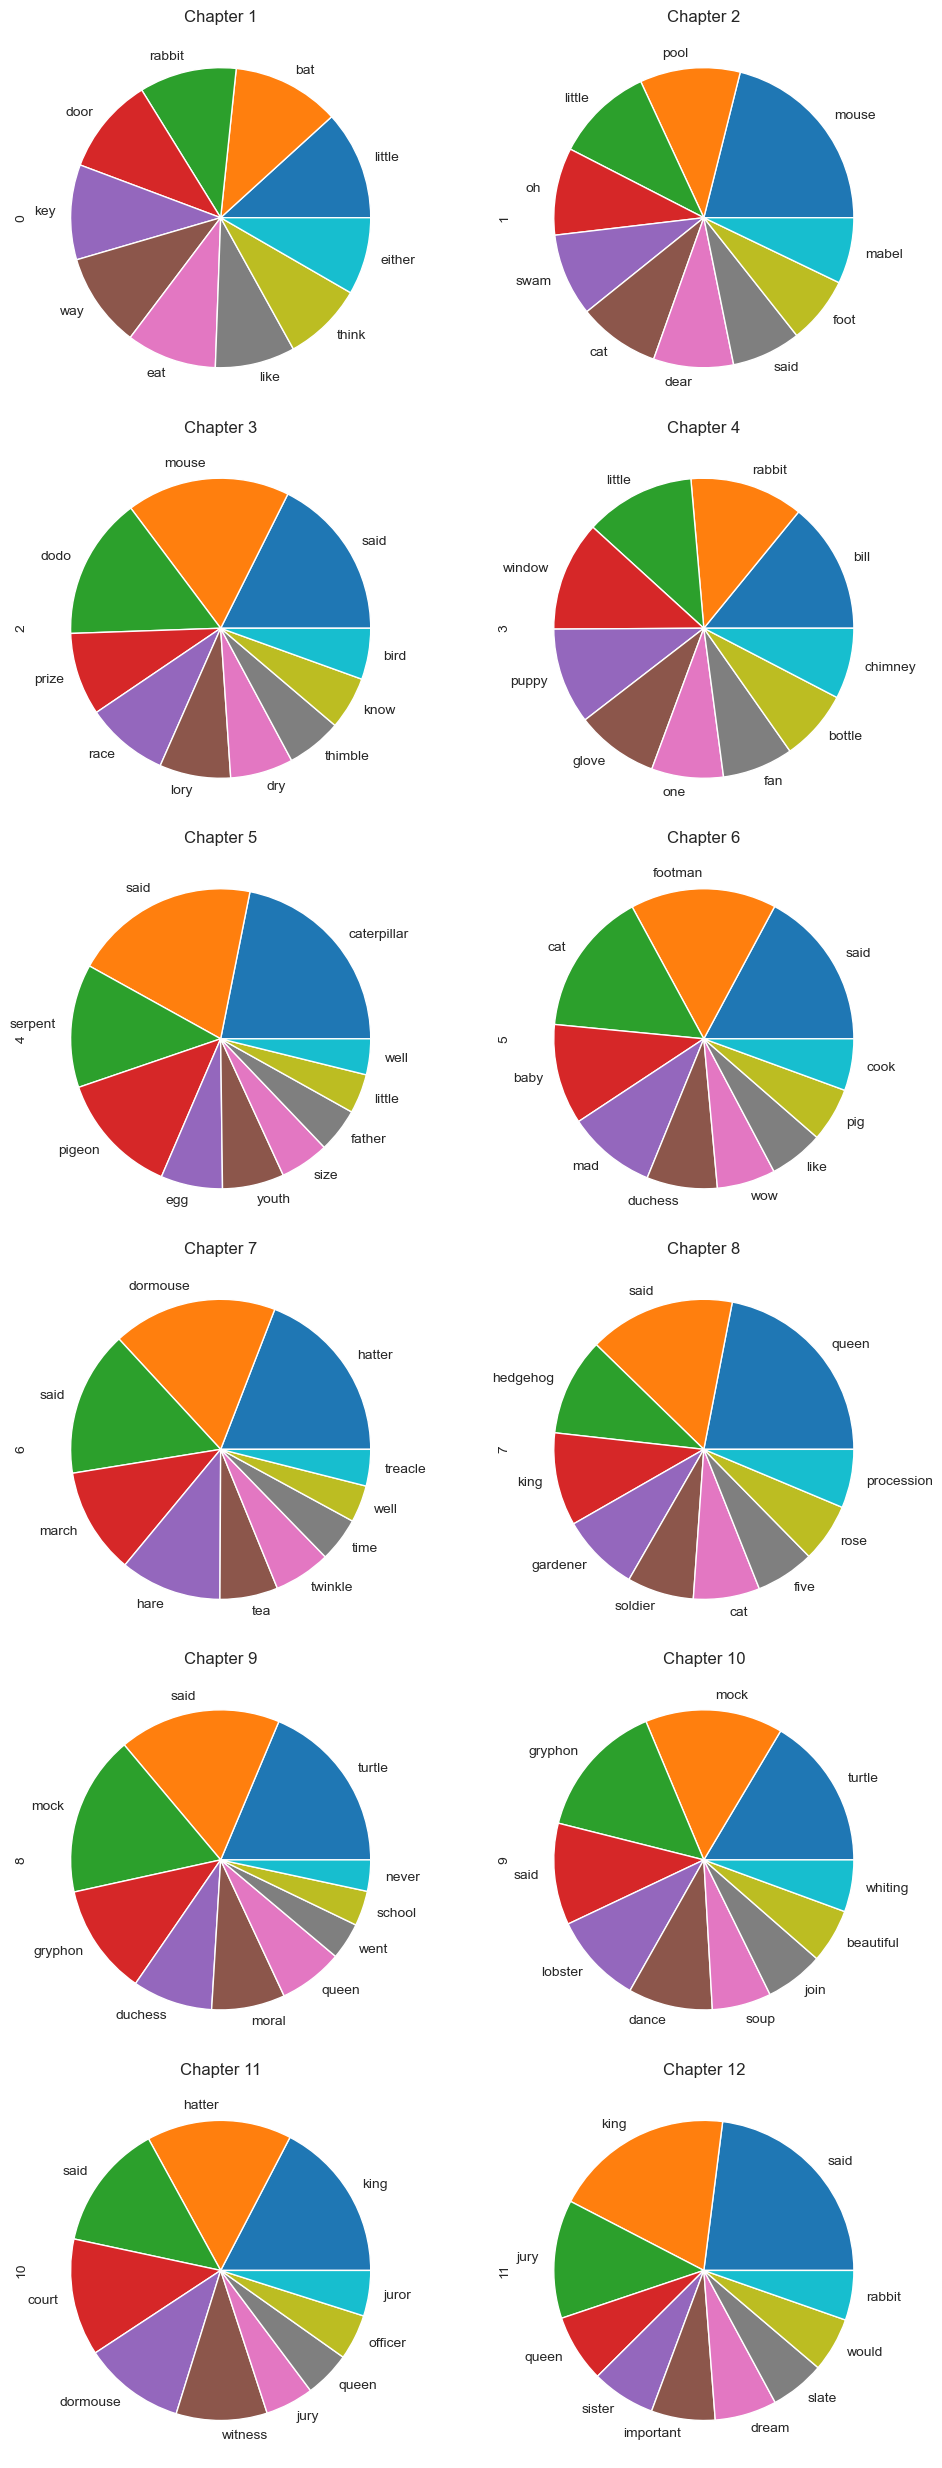

In [7]:
most_used = []
plt.figure(figsize=(10, 25))
for i in range(len(chapters)):
    most_used.append(important_words.loc[i, :].sort_values(ascending=False).head(10))
    plt.subplot(6, 2, i+1)
    plt.title(f'Chapter {i+1}')
    plt.tight_layout()

    most_used[i].plot.pie()

In [8]:
sentences = re.split('[.?!]', ' '.join(chapters))
alice_sentence = ' '.join(sentence for sentence in sentences if 'alice' in sentence)

alice_sentence = re.sub("[^a-zA-Z ]+", " ", alice_sentence)
alice_sentence = re.sub("-", " ", alice_sentence)
alice_sentence = re.sub(" +", " ", alice_sentence)
alice_sentence = WhitespaceTokenizer().tokenize(alice_sentence)
alice_sentence = [token for token in alice_sentence if token not in stop_words]
alice_sentence = [WordNetLemmatizer().lemmatize(token) for token in alice_sentence]

tags = nltk.pos_tag(alice_sentence)
verbs = [verb for verb, tag in tags if tag in ['VB', 'VBG', 'VBD', 'VBN', 'VBP', 'VBZ']]
verbs = [WordNetLemmatizer().lemmatize(verb, 'v') for verb in verbs]

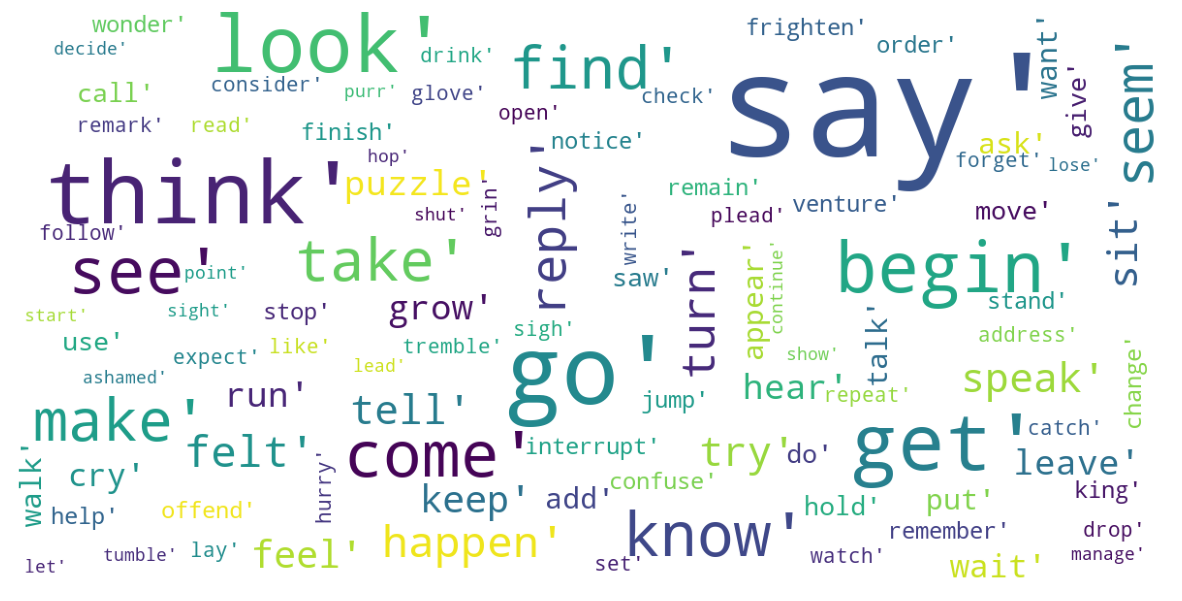

In [9]:
show_wordcloud(verbs)

#Looks like she talks quite a lot

In [10]:
# Let's check the assumption that 'say' is the most frequent action for Alice
verbs = sorted(Counter(alice_sentence).items(), key = lambda x:x[1], reverse = True)[1:]
print('Top 10 verbs:\n')
print(verbs[:10])

Top 10 verbs:

[('said', 174), ('thought', 60), ('little', 42), ('like', 35), ('would', 31), ('could', 31), ('way', 30), ('went', 30), ('much', 29), ('quite', 28)]
